# Introduction à l'apprentissage automatique @ Mines Nancy

# Examen 2023 - partie 2  (10 points)


<br>

Le fichier `banknotes.txt` contient 4 caractéristiques (en colonne) sur 1372 images de billets de banque (en ligne). Il s'agit d'un fichier texte que vous pouvez ouvrir à l'aide d'un éditeur de texte pour visualiser son contenu.

Les quatre caractéristiques sont calculées à partir de chaque image à l'aide d'outils de la théorie de l'analyse en ondelettes. Ils  sont:
1. variance des coefficients de la transformée en ondelettes de l'image,
2. skewness (coefficient d'asymétrie) des coefficients de la transformée en ondelettes de l'image,
3. kurtosis (cofficient d'applatissement) des coefficients de la transformée en ondelettes de l'image,
4. entropie des coefficients de la transformée en ondelettes de l'image.

Dans le cadre de l'examen, il n'est pas utile de savoir comment sont calculés ces caractéristiques (_features_) à partir d'une image de billet. Ce sont des caractéristiques réellement utilisés pour l'analyse d'image: des images semblables auront des caractéristiques proches. 


Le fichier fournit aussi une cinquième colonne, indiquant si le billet considéré est vrai ou faux.
* 1: vrai billet
* 2: faux billet


<br>

L'objectif est d'identifier si on est face à un vrai ou faux billet, en se basant uniquement sur des caractéristiques calculées à partir d'une image du billet. L'hypothèse sous-jacente est qu'il est bien possible de discriminer les vrais ou faux billets à partir de ces caractéristiques.

<br>

On commence par importer les bibliothèques utiles et charger les données. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, neural_network, svm, neighbors, naive_bayes, linear_model
from sklearn import cluster, datasets  # si vous utilisez le clustering de sklearn
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # si vous utilisez le clustering de scipy
%matplotlib inline 

data = np.loadtxt('banknotes.txt', delimiter=",")  

# la dernière colonne est l'étiquette à prédire:
X_data = data[:,:-1]
Y_data = data[:,-1]

print("\nNombre d'observations : %d" %len(X_data))

print("\nNombre de caractéristiques par observation: %d " %X_data.shape[1])

print("\nLes cinq premières observations:")
print(X_data[:5,:])

print("\nLes étiquettes:")
print(Y_data) 

print("\ntailles de X_data et Y_data:")
print(X_data.shape)
print(Y_data.shape)

print("\neffectifs de chaque classe:")
print("classe 1: %d " %np.sum(Y_data==1))
print("classe 2: %d" %np.sum(Y_data==2))



Nombre d'observations : 1372

Nombre de caractéristiques par observation: 4 

Les cinq premières observations:
[[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]]

Les étiquettes:
[1. 1. 1. ... 2. 2. 2.]

tailles de X_data et Y_data:
(1372, 4)
(1372,)

effectifs de chaque classe:
classe 1: 762 
classe 2: 610


On __ne normalisera pas__ les données.

La cellule suivante crée les bases d'apprentissage et de test.

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, Y_data, test_size=0.5, random_state=8)

print("nombre d'observations dans la base d'apprentissage: %d" %len(X_train))
print("nombre d'observations dans la base de test: %d" %len(X_test))

nombre d'observations dans la base d'apprentissage: 686
nombre d'observations dans la base de test: 686


## Travail demandé

### Question préliminaire _(0.5pt)_

Que fait la cellule précédente ? (rôle de `train_test_split`, `test_size` et `random_state`)

Votre réponse:

<font color=red>

La function train_test_split est responsable pourdivisé entre donnés de entré et de sortie.
Par ailleurs, test_size est le taille du test par rapport au train.
Finalement, random_state faire le controle de shuffling applie sur le data avant apliqué le split.

</font>

## Première partie

### 0. Classification non-supervisée _(2pt)_

On va commencer par voir si les outils de classification non-supervisée (partitionnement) appliquées à la base `X_train` permettent d'identifier deux classes bien séparées, susceptibles de correspondre aux deux cas: "faux billet" / "vrai billet".

<br>

Tracez les dendrogrammes pour la classification hiérarchique avec critères "single-linkage" et "Ward", ainsi que le "elbow plot" pour la méthode des $k$-moyennes. Que peut-on en dire de ces graphiques?

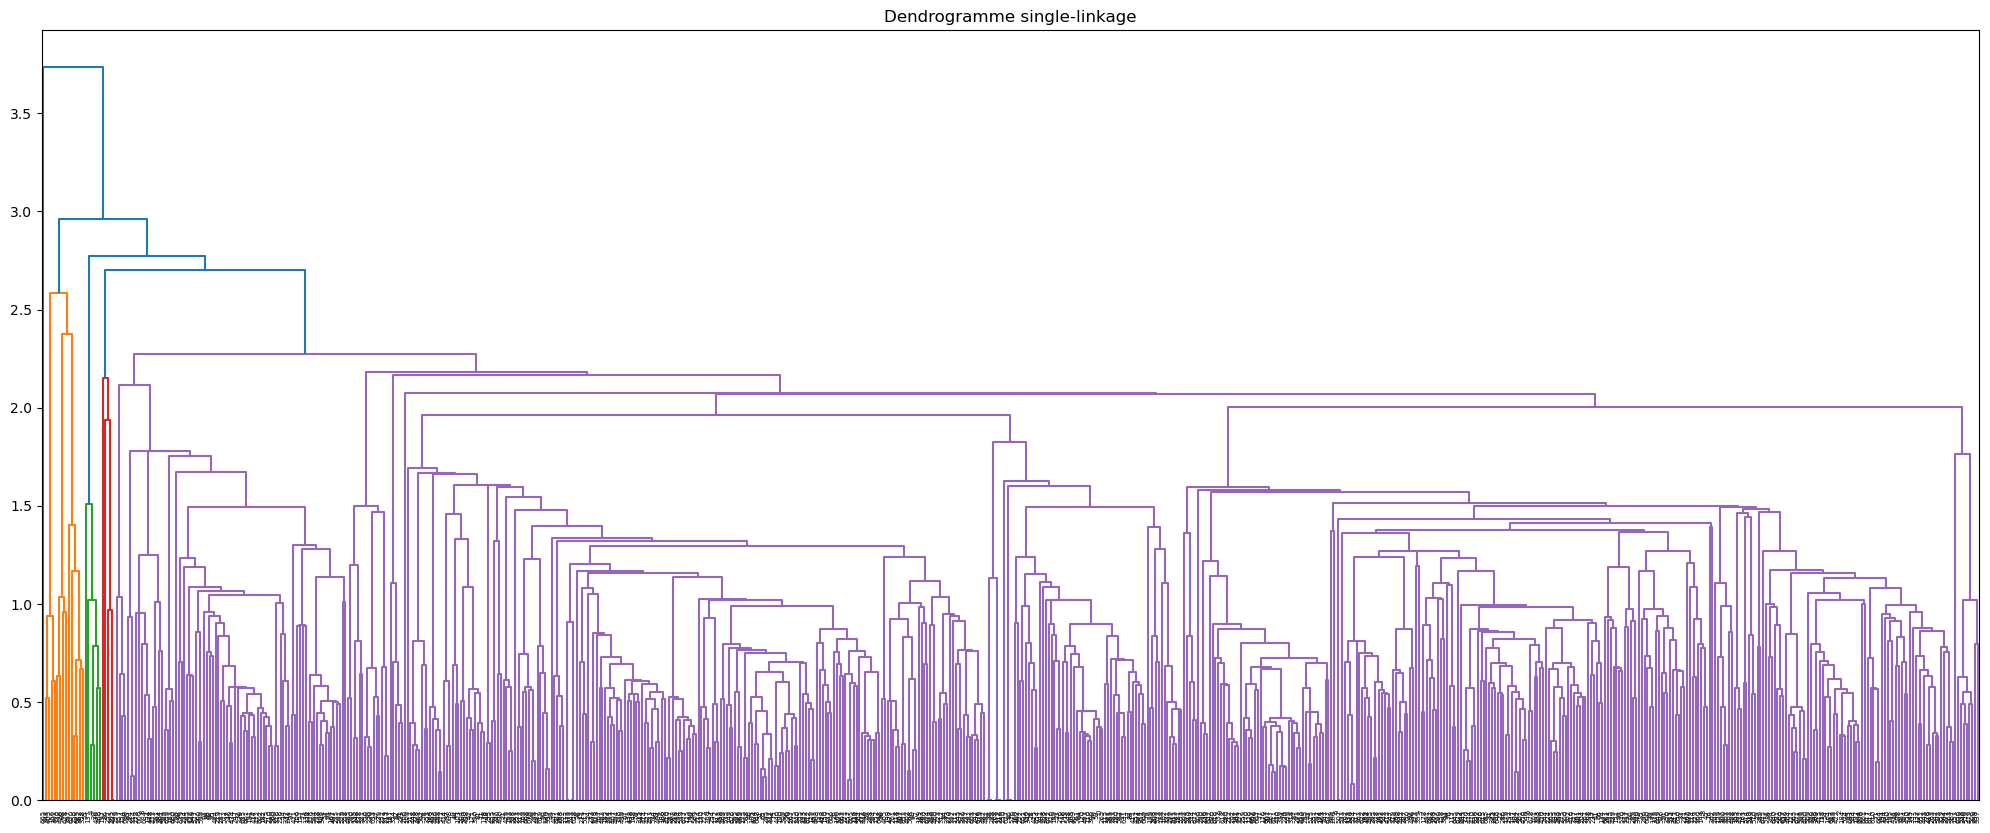

In [4]:
# code pour afficher le dendrogramme "single-linkage"
model_single_linkage = linkage(X_train, method="single")
maxdist = max(model_single_linkage[:,2])
plt.figure(figsize=(25, 10))
dendrogram(model_single_linkage)
plt.title('Dendrogramme single-linkage')
plt.show()

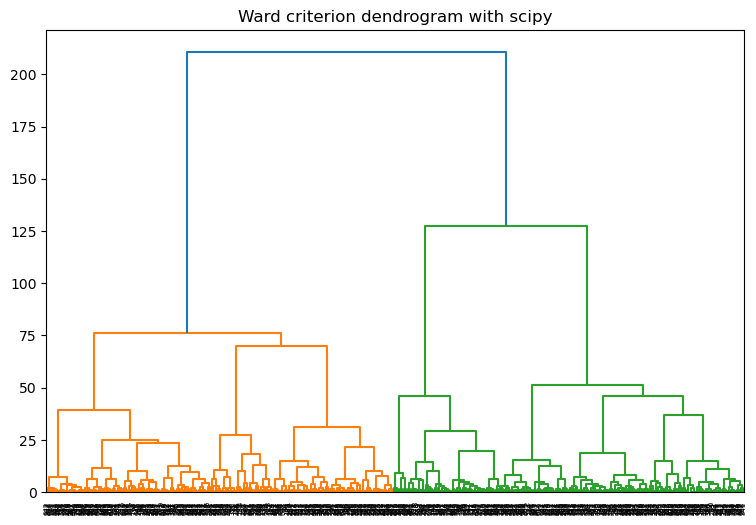

In [5]:
# code pour afficher le dendrogramme "critère de Ward"
Z = linkage(X_train,method="ward")
maxdist=max(Z[:,2])
plt.figure(figsize=[9,6]);
dendrogram(Z)#,truncate_mode="level",p=5)
plt.title('Ward criterion dendrogram with scipy')
plt.show()

c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

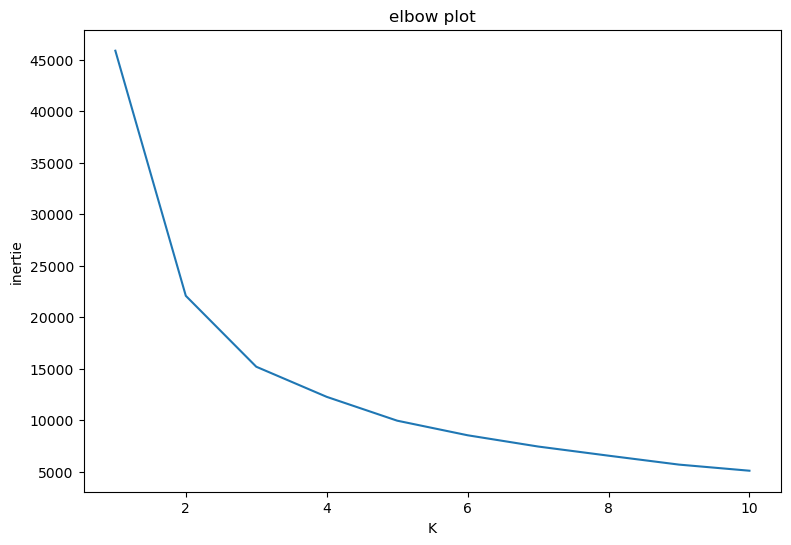

In [6]:
# code pour afficher le "elbow plot"
inertie=np.zeros((10))
for K in range(1,11):
    clustering=cluster.KMeans(n_clusters=K, n_init=10)
    clustering.fit(X_train)
    inertie[K-1]=clustering.inertia_
plt.figure(figsize=[9,6]);
plt.plot(np.arange(1,11),inertie)
plt.xlabel("K");
plt.ylabel("inertie")
plt.title("elbow plot")
plt.show()

Votre réponse:

<font color=red>
  
Le graph on dit lesquelles quantité de cluster vous obtenez le moins inercie.

    
</font>

## Seconde partie

Nous cherchons à présent à construire un classifieur capable de prédire si un billet dont on connaît les caractéristiques est vrai ou faux. Différents classifieurs seront testés.

Pour chaque classifieur entraîné sur `X_train`, vous afficherez à chaque fois la __matrice de confusion__ et le __score de précision__ de la prédiction (_accuracy score_) sur la base test. 

### 1. Classifieur de la régression logistique _(1pt)_

Vous utiliserez le modèle vu en cours, c'est à dire sans terme de régularisation (rappel: il faut passer l'argument `penalty="none"`).

In [7]:
# votre code ici
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic regression accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Logistic regression accuracy:  0.9868804664723032
[[379   7]
 [  2 298]]


###  2. Classifieur Gaussien naïf de Bayes _(0.5pt)_

In [8]:
# NÃO SEI FAZER !!!!!



### 3. Un réseau de neurones artificiels _(1pt)_

Testez un réseau de neurones artificiels à 10 neurones dans une seule couche cachée, au plus 1000 itérations d'apprentissage, et les autres paramètres aux valeurs par défaut. 

In [9]:
# votre code ici
reseau = neural_network.MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
reseau.fit(X_train, y_train)
y_pred = reseau.predict(X_test)
print("Précision du réseau de neurones: %.2f" %metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Précision du réseau de neurones: 1.00
[[386   0]
 [  0 300]]


### 4. Plus proches voisins _(1pt)_

Utilisez une validation croisée à 5 plis pour sélectionner un classifieur aux $K$ plus proches voisins, pour $K=1,2,5,10$.

Testez le classifieur sélectionné sur la base test.

In [17]:
# Use GridSearchCV to find the best value for n_neighbors
param_grid = {'n_neighbors': [1, 2, 5, 10]}
grid_search = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid)
grid_search.fit(X_train, y_train)
k_nn = grid_search.best_estimator_
y_pred = k_nn.predict(X_test)
print(k_nn.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_pred))

1.0
[[386   0]
 [  0 300]]


In [18]:
# code pour le classifieur sélectionné par validation croisée:
param_grid = {'n_neighbors': [1, 2, 5, 10]}
grid_search = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
knn = grid_search.best_estimator_
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_pred))

1.0
[[386   0]
 [  0 300]]


### 5. Machines à vecteurs supports _(1.5pt)_

Testez les machines à vecteurs supports (SVM) à noyau linéaire et à noyau RBF:

- dans le cas `rbf`, vous fixerez l'hyperparamètre $C$ par validation croisée à 5 plis sur la base d'apprentissage en le cherchant dans l'ensemble défini par: `C_range=10**(np.arange(-5.,5.5,0.5))`. Vous garderez la valeur par défaut de l'hyperparamètre $\gamma$.
- dans le cas `linear`, vous utiliserez $C=1$ (c'est la valeur par défaut) et vous ne ferez pas de recherche de l'hyperparamètre (dans certains cas, cela prend trop de temps).

In [12]:
# SVM linear (C=1): votre code ici


In [13]:
# SVM RBF: votre code de validation croisée ici


In [14]:
# SVM RBF sélectionnée


### 6. Conclusion _(2.5 pt)_

a. Définissez le score de prédiction demandé. _(0.5pt)_

b. Quel(s) classifieur(s) sélectionnez-vous et pourquoi ? _(0.5pt)_

c. Que vous dit la matrice de confusion du ou des meilleur(s) classifieur(s) ? _(0.5pt)_

d. Qu'est-ce qui vous assure qu'il n'y a pas surapprentissage ? _(0.5pt)_

e. Quel est le pire classifieur et pourquoi à votre avis ? _(0.5pt)_

Votre réponse:

<font color=red>
    
</font>